# Rossman Store Sales

## Requirements.txt

In [110]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import pearsonr

## Loading data

In [3]:
# importing train and test dataset
train = pd.read_csv("../Rossmann_Store_Sales/Data/train.csv")
test = pd.read_csv("../Rossmann_Store_Sales/Data/test.csv")
store = pd.read_csv("../Rossmann_Store_Sales/Data/store.csv")

/home/mstevankovic/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#how many datas are in the files:
print("Train dataset: ", train.shape[0], " observations and", train.shape[1], " variables.")
print("Test dataset: ", test.shape[0], " observations and", test.shape[1], " variables.")
print("Store dataset: ", store.shape[0], " observations and", store.shape[1], " variables.")

in the training set we have 1017209 observations and 9 columns/variables.
in the testing set we have 41088 observations and 8 columns/variables.
in the store set we have 1115 observations and 10 columns/variables.


# 1. Exploratory Data Analysis

## 1.1. Getting to know train data set

In [5]:
# the first and the last 5 rows of a train dataset
train.head().append(train.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [6]:
# inspecting missing values
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### 1.1.1. Sales variable

In [12]:
len(train[(train['Open'] == 1) & (train['Sales'] == 0)])

# there are 54 observations for which the Store is Opened but there are no Sales.
# Should inspect those observations, maybe there is pattern in that data, maybe some external factor!

54

In [121]:
len(train[(train['Open'] == 0) & (train['Sales'] == 0)])
# there are 172.817 opservations in which one of the stores was closed.

172817

In [75]:
len(train[(train.Open == 1) & (train.Sales > 0)])
# There are 844.338 opservations in which the store was Open and Sales were greater than 0

844338

In [81]:
train_opened = train[(train.Open == 1)]
round(train_opened.Sales.describe(), 2)

count    844392.00
mean       6955.51
std        3104.21
min           0.00
25%        4859.00
50%        6369.00
75%        8360.00
max       41551.00
Name: Sales, dtype: float64

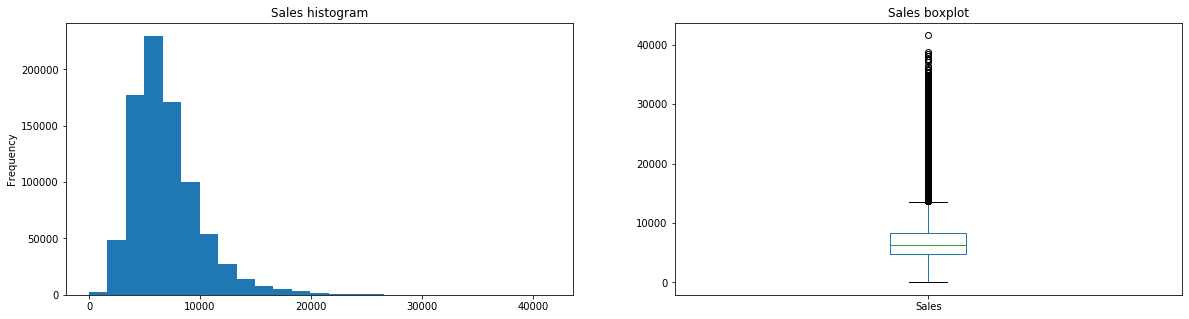

In [89]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train_opened.Sales.plot(kind="hist",title="Sales histogram",bins=25,ax=ax[0])
train_opened.Sales.plot.box(title="Sales boxplot",ax=ax[1])

### 1.1.2. Customers variable

In [92]:
train.Customers.head().append(train.Customers.tail())

0           555
1           625
2           821
3          1498
4           559
1017204       0
1017205       0
1017206       0
1017207       0
1017208       0
Name: Customers, dtype: int64

In [90]:
train.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

In [91]:
train_opened.Customers.describe()

count    844392.000000
mean        762.728395
std         401.227674
min           0.000000
25%         519.000000
50%         676.000000
75%         893.000000
max        7388.000000
Name: Customers, dtype: float64

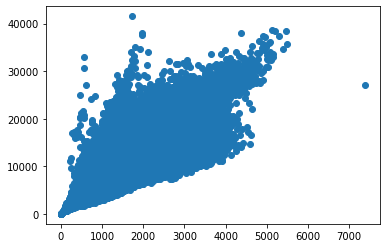

Pearson's correlation between variables Customers~Sales: 0.8947


In [120]:
plt.scatter(train.Customers, train.Sales)
plt.show()

corr = round(pearsonr(train.Customers, train.Sales)[0], 4)

print(f"Pearson's correlation between variables Customers~Sales: {corr}")

# as it is shown in correlation plot, there is a strong positive correlation between 
# Number of Customers and realized Sales.
# Pearson's correlation between these 2 varibles is 0.8947

# Variable Customer represents potentially good predictor.

# 1.1.3. Open variable

In [99]:
train[train.Open == 0].Store.count()
# Stores have been closed 172.817 days/times during the observation period (during these 3 years)
# Remove observations were train.Open==0 ?

172817

In [109]:
print(len(train[(train.Open == 0) & (train.StateHoliday != 0)& (train.StateHoliday != '0')]))
print(len(train[(train.Open == 0) & (train.SchoolHoliday != 0)]))

30140
18264


In [105]:
train.SchoolHoliday.unique()

array([1, 0])

## 1.2. Getting to know Stores Dataset

In [32]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [58]:
store.shape[0]

1115

In [17]:
# Counting missing values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [23]:
# CompetitionDistance missing values
store.CompetitionDistance.head()
store[pd.isnull(store.CompetitionDistance)]

# Simply missing values, no pattern in behaviour, maybe try to impute missing values?
# Impute median value or mean value?
# If there are outpliers, impute median value!

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [59]:
from matplotlib.cbook import boxplot_stats  
len(boxplot_stats(store.CompetitionDistance[store.CompetitionDistance.isnull() == False]).pop(0)['fliers'])

# boxplot_stats() shows 108 outliers, 108 outlies out of 1115 observations, almost 10% of outliers in store dataset

108

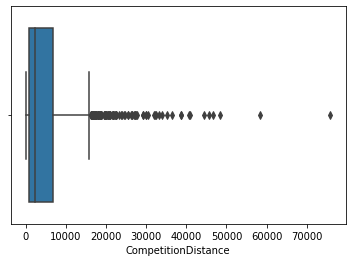

In [49]:
sns.boxplot(store.CompetitionDistance[store.CompetitionDistance.isnull() == False])

In [36]:
round(store.CompetitionDistance.describe(), 2)

count     1112.00
mean      5404.90
std       7663.17
min         20.00
25%        717.50
50%       2325.00
75%       6882.50
max      75860.00
Name: CompetitionDistance, dtype: float64

In [44]:
store[store.CompetitionDistance > 7000].shape
# there are 271 stores where the nearest competition is further than 7 kilometers
print(f"Median value is {round(store.CompetitionDistance.mean() / store.CompetitionDistance.median(), 2)} times less than mean value")

Median value is 2.32 times less than mean value
